In [42]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as stattools
import statsmodels.graphics.tsaplots as tsaplots
from pandas.plotting import autocorrelation_plot

In [23]:
df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')
df.index = df['Date'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))
sdf = df.groupby(by='Month_Year')['Mean temparature'].aggregate([np.mean])
sdf.reset_index(inplace=True)
sdf['Year'] = sdf['Month_Year'].map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
sdf['Month'] = sdf['Month_Year'].map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
sdf.sort_values(by=['Year', 'Month'], inplace=True)
sdf.head(20)

,Month_Year,mean,Year,Month
0,01-1988,-22.137097,1988,01
4,02-1988,-19.025862,1988,02
8,03-1988,-8.258065,1988,03
12,04-1988,2.641667,1988,04
16,05-1988,11.290323,1988,05
20,06-1988,19.291667,1988,06
24,07-1988,19.048387,1988,07
28,08-1988,17.379032,1988,08
32,09-1988,10.675000,1988,09
36,10-1988,2.467742,1988,10


In [32]:
monthly_mean_temp = sdf['mean']
monthly_mean_temp.index = sdf['Month_Year']

In [33]:
seasonal_diff = monthly_mean_temp.diff(12)
seasonal_diff.head(20)

Month_Year
01-1988         NaN
02-1988         NaN
03-1988         NaN
04-1988         NaN
05-1988         NaN
06-1988         NaN
07-1988         NaN
08-1988         NaN
09-1988         NaN
10-1988         NaN
11-1988         NaN
12-1988         NaN
01-1989    5.008065
02-1989   -0.241995
03-1989   -4.250000
04-1989   -1.483333
05-1989    0.193548
06-1989   -4.616667
07-1989    1.612903
08-1989   -0.177419
Name: mean, dtype: float64

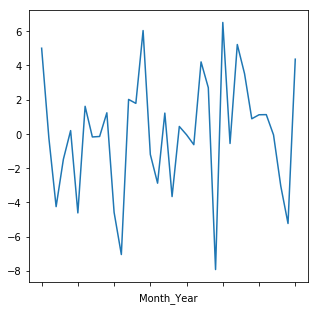

In [34]:
seasonal_diff = seasonal_diff[12:]
plt.figure(figsize=(5,5))
seasonal_diff.plot()

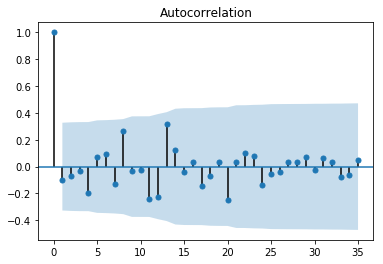

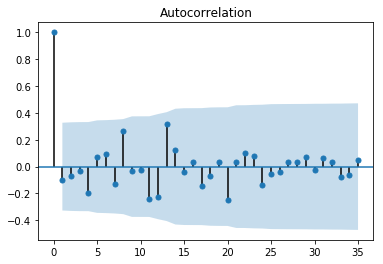

In [35]:
tsaplots.plot_acf(seasonal_diff)

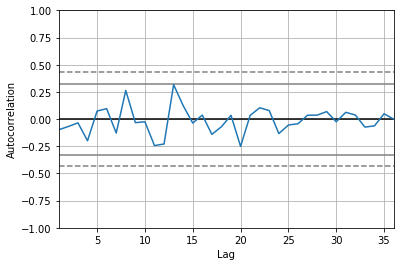

In [37]:
autocorrelation_plot(seasonal_diff)

In [43]:
_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased=True, nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


In [44]:
# Ljung-Box test
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_diff, unbiased=True, nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)
